In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = keras.preprocessing.image_dataset_from_directory(
    'images',
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    shuffle = True
)

Found 363 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

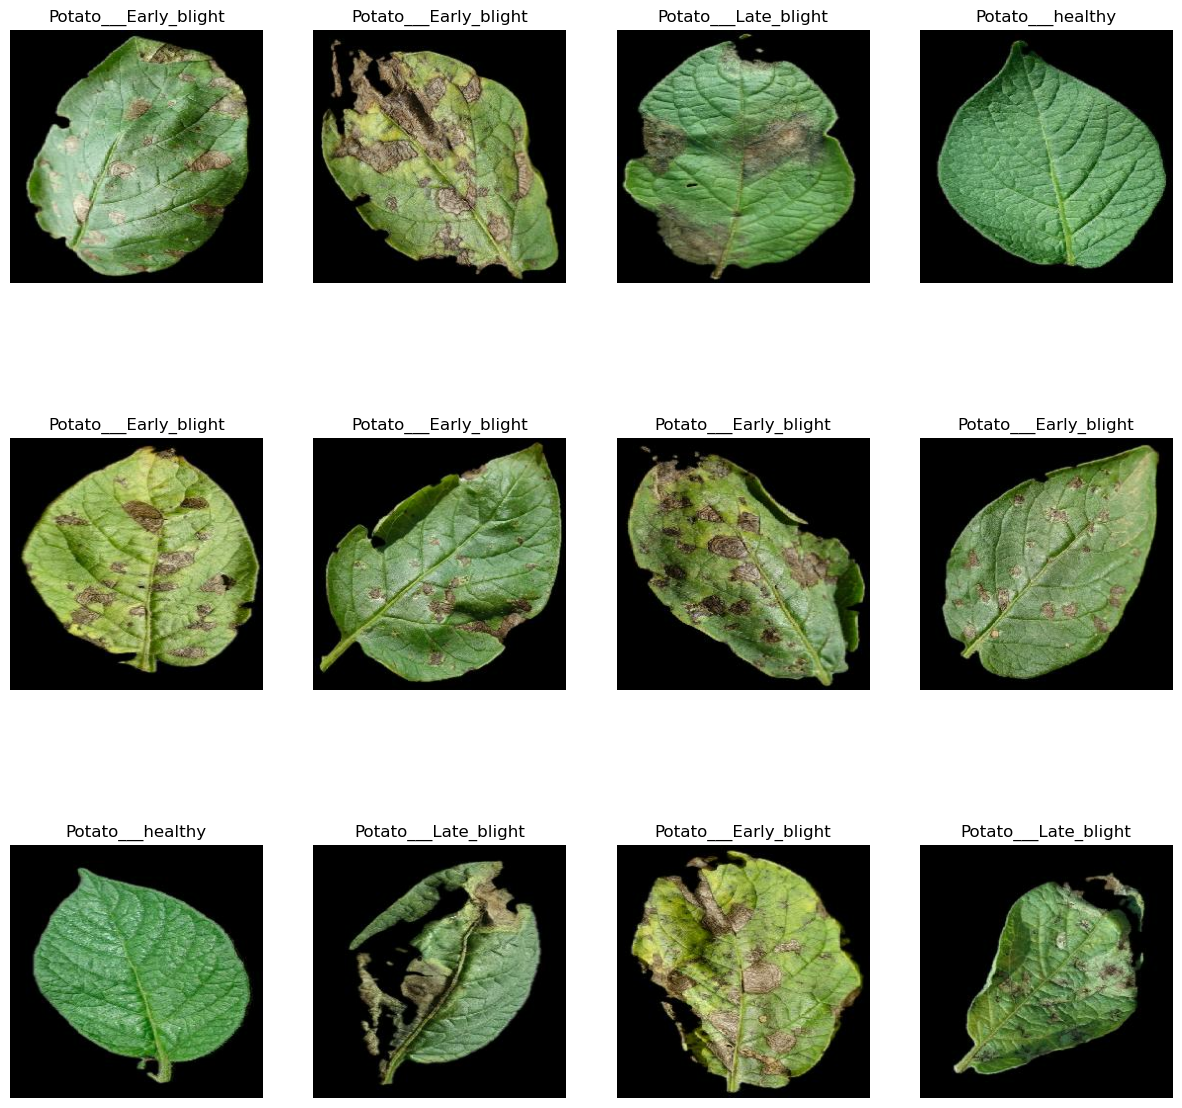

In [17]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis('off')

In [18]:
#split the dataset, cache and prefetch, resizing and rescaling, data augmentation

In [19]:
len(dataset)

12

In [20]:
train_ds = dataset.take(9)

In [21]:
test_ds = dataset.skip(9)

In [22]:
val_ds = test_ds.take(1)

In [23]:
test_ds = test_ds.skip(1)

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resizing_and_rescaling = models.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [29]:
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [32]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    
    resizing_and_rescaling,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])

model.build(input_shape = input_shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [33]:
model.compile(
            optimizer = 'adam',
            loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics = ['accuracy']
)

In [35]:
import warningswarningarnings.filterwarnings('ignore')

In [37]:
model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data=val_ds,
    shuffle = True,
    epochs = EPOCHS
)

Epoch 1/50
9/9 [==============================] - 25s 3s/step - loss: 0.0370 - accuracy: 0.9896 - val_loss: 0.1922 - val_accuracy: 0.9688
Epoch 2/50
9/9 [==============================] - 26s 3s/step - loss: 0.0799 - accuracy: 0.9757 - val_loss: 0.1330 - val_accuracy: 0.9062
Epoch 3/50
9/9 [==============================] - 26s 3s/step - loss: 0.0540 - accuracy: 0.9757 - val_loss: 0.2736 - val_accuracy: 0.9062
Epoch 4/50
9/9 [==============================] - 25s 3s/step - loss: 0.0677 - accuracy: 0.9653 - val_loss: 0.0829 - val_accuracy: 0.9688
Epoch 5/50
9/9 [==============================] - 27s 3s/step - loss: 0.0341 - accuracy: 0.9861 - val_loss: 0.1495 - val_accuracy: 0.9062
Epoch 6/50
9/9 [==============================] - 26s 3s/step - loss: 0.0876 - accuracy: 0.9618 - val_loss: 0.9904 - val_accuracy: 0.7812
Epoch 7/50
9/9 [==============================] - 26s 3s/step - loss: 0.0812 - accuracy: 0.9792 - val_loss: 0.1021 - val_accuracy: 0.9688
Epoch 8/50
9/9 [==================

In [40]:
model.evaluate(test_ds)

2/2 [==============================] - 1s 282ms/step - loss: 0.4564 - accuracy: 0.9535


[0.4563838541507721, 0.9534883499145508]

In [41]:
y_pred = model.predict(test_ds)

2/2 [==============================] - 1s 698ms/step


In [42]:
np.argmax(y_pred)

3

In [43]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:10]

[2, 0, 1, 2, 0, 1, 2, 0, 0, 0]

In [46]:
model.save('potatoes_model')

INFO:tensorflow:Assets written to: potatoes_model\assets


INFO:tensorflow:Assets written to: potatoes_model\assets
